# Exercises (18/05/2020)

## Exercises #3

Dogs underwent to 3 different diet regimens (A,B,C).

Check if diets influence the weights.

In [144]:
import pandas as pd
table1 = pd.read_excel("datasets/dogs.xlsx")
table1

,Diet_A,Diet_B,Diet_C
0,12.0,8.0,10
1,15.0,7.0,6
2,12.0,7.0,8
3,13.0,7.0,16
4,10.0,10.0,6
5,12.0,9.0,6
6,14.0,9.0,7
7,10.0,9.0,15
8,10.0,9.0,7
9,NaN,8.0,7


The __box plot__ is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers.

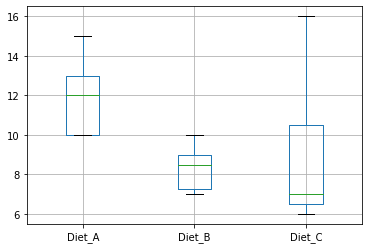

In [145]:
from matplotlib import pyplot

table1.boxplot(['Diet_A', 'Diet_B', 'Diet_C'])
pyplot.show()

From visual inspection no outliers can be identified. Let's then extract the population and start doing some statistics.

In [149]:
diet_A = table1['Diet_A']
diet_B = table1['Diet_B']
diet_C = table1['Diet_C']

Analysis of variance (anova) is the most commonly used technique for comparing the means of groups of measurement data. In this case I would use a __one-way Anova__ test.

The statistical null hypothesis is that the means of the measurement variable are the same for the different categories of data; the alternative hypothesis is that they are not all the same.

__null hypothesis H0__: "the outcome of the three different diets is the same among the datasets"

Even though we have a few samples for each population the trends seem suggests normality in all cases. One-way anova assumes that the observations within each group are normally distributed. It is not particularly sensitive to deviations from this assumption; if you apply one-way anova to data that are non-normal, your chance of getting a P value less than 0.05. Just for clarity I'm going to run both a one-way Anova test and a kruskal-wallis test.

In [159]:
import scipy.stats as stats

diet_A = diet_A.dropna()
diet_B = diet_B.dropna()
diet_C = diet_C.dropna()
print(stats.f_oneway(diet_A, diet_B, diet_C))
print(stats.kruskal(diet_A, diet_B, diet_C))

F_onewayResult(statistic=5.897953040337146, pvalue=0.007495509788548743)
KruskalResult(statistic=10.525098048632142, pvalue=0.005182078624626965)


In [160]:
if 0.005 < 0.05:  
    print("we are rejecting null hypothesis, result is statistically significant, diet DOES affect weight")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant, diet DOES NOT affect weight")

we are rejecting null hypothesis, result is statistically significant, diet DOES affect weight


## Exercise #5

Load file ‘‘animali.xlsx’’
1. Check if the diet regimen induced significant variations in the weights at the
date 20 gennaio (20th January)
2. Which group has the largest median value?

In [32]:
table2 = pd.read_excel("datasets/animali.xlsx")
table2[['peso 20 gennaio', 'trattamento alimentare']]

,peso 20 gennaio,trattamento alimentare
0,32.00,1
1,23.35,2
2,23.80,3
3,25.70,3
4,27.40,3
5,25.70,3
6,30.40,2
7,31.00,1
8,150.00,1
9,22.15,1


The __box plot__ is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers.

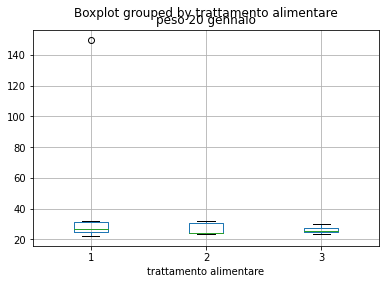

In [24]:
#pyplot.boxplot(table2["peso 20 gennaio"])
table2.boxplot(column='peso 20 gennaio', by='trattamento alimentare')
pyplot.show()

The output shows  a clear outlier for 'trattamento alimentare #1'. From visual inspection we can easily find out the outlier and get rid of it.

In [38]:
new_table2 = table2.drop(8)
new_table2.reset_index(drop=True)[['peso 20 gennaio', 'trattamento alimentare']]

,peso 20 gennaio,trattamento alimentare
0,32.00,1
1,23.35,2
2,23.80,3
3,25.70,3
4,27.40,3
5,25.70,3
6,30.40,2
7,31.00,1
8,22.15,1
9,24.00,2


### 5.1

__H0__: _"Different Treatment does not affect weight"_

In this case I would use a __one-way anova__. We use one-way anova when you have one nominal variable and one measurement variable; the nominal variable divides the measurements into two or more groups. It tests whether the means of the measurement variable are the same for the different groups. One-way-anova is a parametric test so  a normality check should be run. Let's first extract the 3  populations to be compared.

In [57]:
treatment_1 = new_table2.loc[new_table2['trattamento alimentare'] == 1]['peso 20 gennaio']
treatment_2 = new_table2.loc[new_table2['trattamento alimentare'] == 2]['peso 20 gennaio']
treatment_3 = new_table2.loc[new_table2['trattamento alimentare'] == 3]['peso 20 gennaio']

Let's run a normality check using a Q-Q plot as a first attempt.

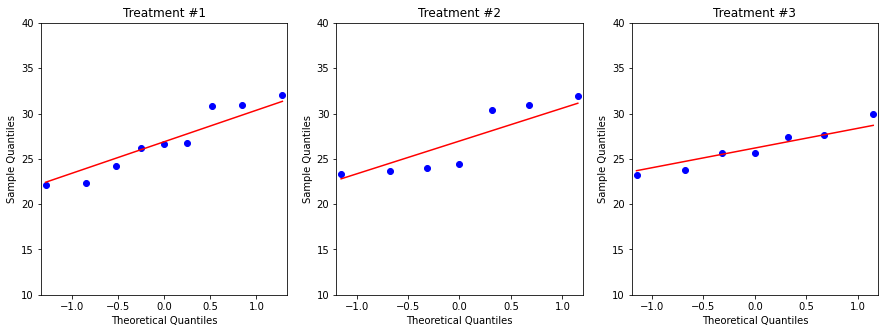

In [60]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, figsize=(15,5))
ax1.title.set_text('Treatment #1')
ax2.title.set_text('Treatment #2')
ax3.title.set_text('Treatment #3')
qqplot(treatment_1, line='s', ax=ax1)
qqplot(treatment_2, line='s', ax=ax2)
qqplot(treatment_3, line='s', ax=ax3)
ax1.set_ylim([10, 40])
ax2.set_ylim([10, 40])
ax3.set_ylim([10, 40])
pyplot.show()

Even though we have a few samples for each population the trends seem suggests normality in all cases. One-way anova assumes that the observations within each group are normally distributed. It is not particularly sensitive to deviations from this assumption; if you apply one-way anova to data that are non-normal, your chance of getting a P value less than 0.05. Just for clarity I'm going to run both a one-way Anova test and a kruskal-wallis test.

In [147]:
print(stats.f_oneway(treatment_1, treatment_2, treatment_3))
print(stats.kruskal(treatment_1, treatment_2, treatment_3))

F_onewayResult(statistic=0.11037236270948646, pvalue=0.8960422573608676)
KruskalResult(statistic=0.16786774056802573, pvalue=0.9194920598334048)


In [69]:
if 0.9 < 0.05:  
    print("we are rejecting null hypothesis, result is statistically significant, treatment DOES affect weight")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant, treatment DOES NOT affect weight")

we are accepting null hypothesis, the result is NOT statistically significant, treatment DOES NOT affect weight


### 5.2

In [85]:
from statistics import median
import numpy as np

treatment_medians = np.array([median(treatment_1), median(treatment_2), median(treatment_3)])
print('The group with largest median is treatment #',np.argmax(treatment_medians) + 1)


The group with largest median is treatment # 1


## Exercises #6

Load file‘‘animali.xlsx’’.

Check if differences exists among the weights in the three measuring epochs
(20gennaio, 15Febbraio, 10Marzo)

In [101]:
table3 = pd.read_excel("datasets/animali.xlsx")
table3[['peso 20 gennaio', 'peso 15 febbraio', 'peso 10 marzo']]

,peso 20 gennaio,peso 15 febbraio,peso 10 marzo
0,32.00,48.90,93
1,23.35,43.45,72
2,23.80,51.20,100
3,25.70,52.60,107
4,27.40,54.90,100
5,25.70,54.80,91
6,30.40,59.00,106
7,31.00,60.20,106
8,150.00,53.80,90
9,22.15,48.50,860


The __box plot__ is a standardized way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is often used to identify data distribution and detect outliers.

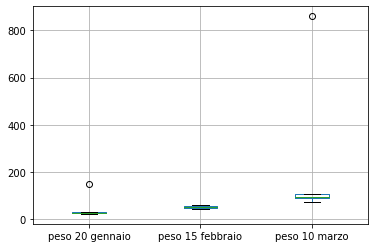

In [93]:
table3.boxplot(['peso 20 gennaio', 'peso 15 febbraio', 'peso 10 marzo'])
pyplot.show()

In [109]:
new_table3 = table3.drop([8, 9])
new_table3.reset_index(drop=True)[['peso 20 gennaio', 'peso 15 febbraio', 'peso 10 marzo']]

,peso 20 gennaio,peso 15 febbraio,peso 10 marzo
0,32.00,48.90,93
1,23.35,43.45,72
2,23.80,51.20,100
3,25.70,52.60,107
4,27.40,54.90,100
5,25.70,54.80,91
6,30.40,59.00,106
7,31.00,60.20,106
8,24.00,52.20,90
9,22.35,41.10,79


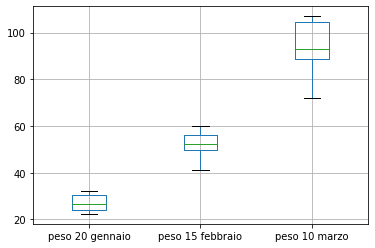

In [110]:
new_table3.boxplot(['peso 20 gennaio', 'peso 15 febbraio', 'peso 10 marzo'])
pyplot.show()

We can now appreciate the boxplots without outliers.

The __Friedman test__ is the nonparametric version of the repeated measures analysis of variance test, or repeated measures ANOVA. The test can be thought of as a generalization of the Kruskal-Wallis Test to more than two samples. The default assumption, or null hypothesis, is that the multiple paired samples have the same distribution. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution.

__Null Hypothesis H0__: Paired sample distributions are equal.

In [116]:
from scipy.stats import friedmanchisquare

date_1 = new_table3['peso 20 gennaio']
date_2 = new_table3['peso 15 febbraio']
date_3 = new_table3['peso 10 marzo']

stat, p = friedmanchisquare(date_1, date_2, date_3)



2.7894680928689257e-10

In [118]:
if p < 0.05:  
    print("we are rejecting null hypothesis, result is statistically significant, weight DOES change in time")
else:
    print("we are accepting null hypothesis, the result is NOT statistically significant, weight DOES NOT change in time")

we are rejecting null hypothesis, result is statistically significant, weight DOES change in time
